# KMeans实现图像分割

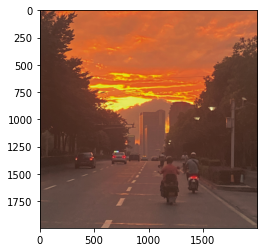

In [31]:


#图像的加载与展示
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as io
img = io.imread('IMG_1349.JPG')
plt.imshow(img)

In [32]:

#查看数据结果与维度
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(1997, 1997, 3)


In [3]:
#查看数据内容
print(img)

[[[226 217  88]
  [228 219  90]
  [230 221  92]
  ...
  [148 136 234]
  [148 137 229]
  [149 136 228]]

 [[226 219  89]
  [229 220  91]
  [230 221  92]
  ...
  [149 135 233]
  [147 136 228]
  [146 135 227]]

 [[228 219  90]
  [229 220  91]
  [230 221  92]
  ...
  [147 135 233]
  [146 135 227]
  [148 135 227]]

 ...

 [[ 42  39  22]
  [ 44  43  25]
  [ 39  37  22]
  ...
  [ 42  56  31]
  [ 60  65  45]
  [ 68  76  55]]

 [[ 46  45  27]
  [ 45  44  26]
  [ 39  37  24]
  ...
  [ 41  57  31]
  [ 60  65  45]
  [ 61  66  46]]

 [[ 51  45  33]
  [ 50  46  34]
  [ 47  43  34]
  ...
  [ 45  57  35]
  [ 63  67  50]
  [ 63  70  54]]]


In [33]:
#维度存储
img_height = img.shape[0]
img_width = img.shape[1]
print(img_height,img_width)

1997 1997


In [34]:
#数据维度转化
img_data = img.reshape(-1,3)
print(img.shape,img_data.shape)
print(img_data)


(1997, 1997, 3) (3988009, 3)
[[187 111  75]
 [186 110  76]
 [190 112  76]
 ...
 [118  98  89]
 [123 101  88]
 [123 103  94]]


In [35]:
X = img_data

In [48]:
#模型建立与训练
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7,random_state=0)
model.fit(X)

KMeans(n_clusters=7, random_state=0)

In [49]:
#聚类结果预测
label = model.predict(X)
print(label)
import pandas as pd
print(pd.value_counts(label))

[3 3 3 ... 0 0 0]
0    1097472
2     836579
6     738583
3     673701
4     533652
1      59273
5      48749
dtype: int64


In [50]:
#结果数据的维度转化
label = label.reshape([img_height,img_width])
print(label)
print(label.shape)

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1997, 1997)


In [51]:
#后续的灰度处理
label = 1/(label+1)
print(label)

[[0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 [0.25 0.25 0.25 ... 0.25 0.25 0.25]
 ...
 [1.   1.   1.   ... 1.   1.   1.  ]
 [1.   1.   1.   ... 1.   1.   1.  ]
 [1.   1.   1.   ... 1.   1.   1.  ]]


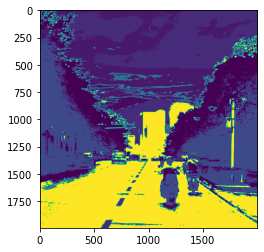

In [52]:
#结果的可视化
plt.imshow(label)

In [53]:
io.imsave('sunset_k7.png',label)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
